## Summary

Data downloaded from:
http://pla.esac.esa.int/pla/#cosmology
(choose 'Cosmology', then 'CMB angular power spectra')

The data corresponds to Figure 1 in the famous paper 13: https://www.aanda.org/articles/aa/full_html/2016/10/aa25830-15/aa25830-15.html
Other data in the .fits files are from Fig. 3. Also, the .txt files give the unbinned versions and the separate columns.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=18)
plt.rcParams['figure.figsize'] = (10.0, 7.0)

In [2]:
from astropy.io import fits # If this yields an ImportError, go to your terminal and tell it `conda install astropy`

## Functions

### Extracting the measured data

In [99]:
def extract_column(f, column_index):
    '''
    Give the fits file and the column index that you want to extract.
    '''
    d = f[column_index]
    arr = np.array(d.data)
    cols = d.columns.names

    # Either one L value or a range
    # Take the average if it is a range
    if 'ELL' not in cols:
        if 'LMIN' in cols and 'LMAX' in cols:
            arr['ELL'] = 0.5 * (arr['LMIN'] + arr['LMAX'])
        else:
            raise ValueError('Error: did not find ELL or LMIN and LMAX in columns.')
    x = arr['ELL']
    y = arr['D_ELL']
    
    # Depending on the data, the error is two-sided or not.
    if 'ERR' in cols:
        dy = (arr['ERR'], arr['ERR'])
    elif 'ERRUP' in cols and 'ERRDOWN' in cols:
        dy = (arr['ERRDOWN'], arr['ERRUP'])
    else:
        raise ValueError('Error: did not find ERR or ERRUP and ERRDOWN in columns.')
    
    return x, y, dy
    

In [116]:
def extract_data(f, indices = (1, 7)):
    # First extract all outputs
    xydys = []
    for index in indices:
        xydys.append(extract_column(f, index))
    x = np.concatenate([xydy[0] for xydy in xydys])
    y = np.concatenate([xydy[1] for xydy in xydys])
    dydown = np.concatenate([xydy[2][0] for xydy in xydys])
    dyup = np.concatenate([xydy[2][0] for xydy in xydys])
    dy = (dydown, dyup)
    return x, y, dy

### Plotting

In [164]:
import matplotlib as mpl
def draw_box(x, y, **kwargs):
    """Draw rectangle, given x-y boundary tuples"""
    # Arcane syntax of the week: matplotlib's Rectangle...
    plt.gca().add_patch(mpl.patches.Rectangle(
        (x[0], y[0]), x[1] - x[0], y[1] - y[0], **kwargs))

## Reading data

### Extract the measured data

In [146]:
fits_fn = 'data/COM_PowerSpect_CMB_R2.02.fits'
f = fits.open(fits_fn)
x,y, dy = extract_data(f)

### Extracting the fit data

The fit data is *not* the .fits file, actually. Hmm.

In [126]:
theory = np.loadtxt('data/COM_PowerSpect_CMB-base-plikHM-TT-lowTEB-minimum-theory_R2.02.txt')

In [128]:
xt = theory[:, 0]
yt = theory[:, 1]

## Plots!

### Fancy plot of the TT power spectrum

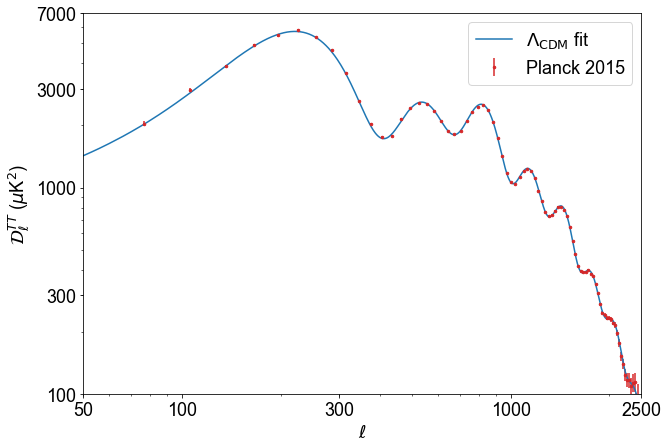

In [234]:
show_inset = False

fig = plt.figure()
plt.plot(xt, yt, label=r'$\Lambda_{\rm CDM}$ fit')
plt.errorbar(x, y, dy, marker='.', markersize=5, ls='None', label='Planck 2015', color='C3')
plt.yscale('log')
plt.xscale('log')

plt.xlim(50, 2500)
plt.ylim(100, 7e3)
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{D}^{TT}_{\ell}$ ($\mu$K$^2$)')
xticks = [50, 100, 300, 1000, 2500]
yticks =  [100, 300, 1000, 3000, 7000]
plt.xticks(xticks, xticks)
plt.yticks(yticks, yticks)


if show_inset:
    x_inset = (740, 860)
    y_inset = (2250, 2600)
    lw_spine = 2
    c_spine = 'C1'
    left, bottom, width, height = [0.25, 0.25, 0.32, 0.32]

    draw_box(x_inset, y_inset, facecolor='None', edgecolor=c_spine, lw=lw_spine)
    ax2 = fig.add_axes([left, bottom, width, height])
    plt.sca(ax2)
    plt.plot(xt, yt, label=r'$\Lambda_{\rm CDM}$ fit')
    plt.errorbar(x, y, dy, marker='.', markersize=5, ls='None', color='C3')
    plt.xlim(x_inset)
    plt.ylim(y_inset)

    for spine in ax2.spines.values():
            spine.set_edgecolor('C1')
            spine.set_lw(lw_spine)
        
plt.savefig('/home/erik/win/notes/planck.pdf', bbox_inches='tight')

## Other plots

The easy version you may be familiar with.

(0, 6100)

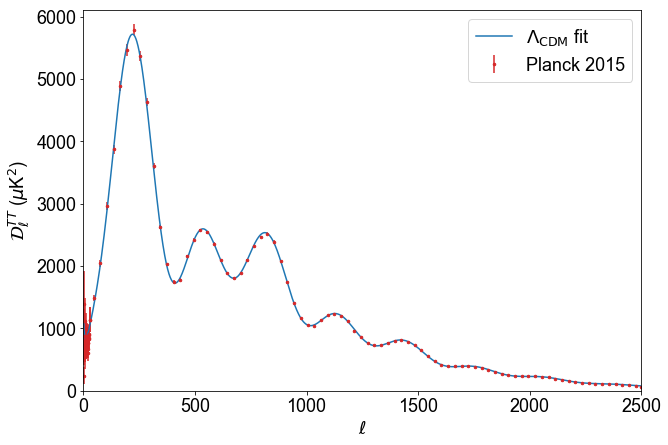

In [228]:
plt.plot(xt, yt, label=r'$\Lambda_{\rm CDM}$ fit')
plt.errorbar(x, y, dy, marker='.', markersize=5, ls='None', label='Planck 2015', color='C3')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{D}^{TT}_{\ell}$ ($\mu$K$^2$)')
plt.xlim(0, 2500)
plt.ylim(0, 6100)


In [229]:
h = 0.6774

In [233]:
1/h**2 * 0.00014

0.00030509679893310265